# Task 1 - Import the libraries, load the dataset, and split it into training and test subsets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Task 2 - Elbow plot

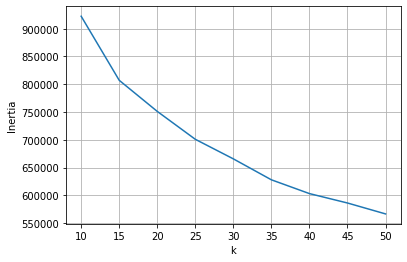

In [3]:
from sklearn.cluster import KMeans
inertias = []

for k in range(10, 51, 5):
  kmeans = KMeans(random_state = 0, n_clusters = k)
  kmeans.fit(X_train)
  inertias.append(kmeans.inertia_)

plt.plot(range(10, 51, 5), inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()


# Task 3 - Select number of clusters

In [4]:
k = 15

# Task 4 - Get the distances of the first instance from the centroids

In [5]:
kmeans = KMeans(random_state=0, n_clusters=15)
transformed = kmeans.fit_transform(X_train)
print(transformed[0])

[40.27473174 48.89414703 47.03967829 52.34630829 55.2135072  43.87537153
 43.99011546 44.39907444 54.96211714 56.20646651 27.03319993 52.79477229
 50.82501222 49.00040622 43.86789918]


# Task 5 - Verify the cluster of the first instance

In [6]:
X_train0_2D = X_train[0].reshape((1, -1))
print(kmeans.predict(X_train0_2D))

[10]


# Task 6 - Create a pipeline to train our model

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline(
    [('cluster', KMeans(random_state=0, n_clusters=15)), 
     ('scaler', StandardScaler()), 
     ('svm', SVC(random_state=0))])


# Task 7 - Perform a grid search to find the best hyperparameters

In [8]:
from sklearn.model_selection import GridSearchCV

params = {'svm__C':[1, 5, 8, 10], 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipeline, params, cv=4, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9763424636335499
{'svm__C': 8, 'svm__kernel': 'rbf'}


# Task 8 - Evaluate the best estimator on the test set

In [9]:
from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

0.9805555555555555
